In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('gurgaon_properties_v')cleaned_v1.cs

In [9]:
df.duplicated().sum()

122

In [12]:
df.shape

(3803, 17)

In [15]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,servant room,45.0,East,24-May,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN


## 1. areaWithType

In [11]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3094,1.07,1350.0,Super Built up area 1350(125.42 sq.m.)
1216,0.34,629.0,Carpet area: 629 (58.44 sq.m.)
1816,1.25,1423.0,Built Up area: 1423 (132.2 sq.m.)Carpet area: 1190 sq.ft. (110.55 sq.m.)
143,1.40,2208.0,Built Up area: 1735 (161.19 sq.m.)
205,0.55,1130.0,Carpet area: 1130 (104.98 sq.m.)


In [16]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area[:\s]?(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [17]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [19]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed

def convert_to_sqft(text, area_value):
    # If area_value is None, return None immediately
    if area_value is None:
        return None
    
    # Look for the specific area_value in the text followed by (some number) sq.m.
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    
    # If a match is found (i.e., area is in sq.m.), convert it to sqft
    if match:
        sq_m_value = float(match.group(1))  # Get the numerical value of sq.m.
        return sq_m_value * 10.7639  # Convert sq.m. to sqft using the conversion factor
    
    # If no match found, return the original area_value
    return area_value


In [20]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [21]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3419,1.24,flat,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1150.0,1050.0,1000.0
3725,1.95,flat,1400.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),1852.0,NaN,1400.0
3278,0.85,flat,1530.0,Super Built up area 1350(125.42 sq.m.),1350.0,NaN,NaN
2416,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
240,0.99,flat,1623.0,Super Built up area 1621(150.6 sq.m.),1621.0,NaN,NaN


In [22]:
df.duplicated().sum()

122

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,19.00,house,6000.0,Plot area 9000(836.13 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),NaN,NaN,6000.0
3,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,NaN,NaN
16,1.25,house,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 sq.yards (100.34 sq.m.),NaN,120.0,NaN
20,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN
21,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,NaN,NaN


In [27]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [25]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [24]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [29]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,NaN,NaN
20,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,NaN,NaN
21,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,NaN,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,NaN,NaN
34,3.10,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN


In [31]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [32]:
all_nan_index

Index([   3,   20,   21,   31,   34,   36,   38,   52,   57,   59,
       ...
       3679, 3682, 3701, 3735, 3748, 3763, 3775, 3780, 3781, 3795],
      dtype='int64', length=546)

In [33]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [34]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [35]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,64.00,NaN
20,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
21,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,1460.00,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.00,NaN
34,3.10,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
36,18.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
38,5.00,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
52,4.70,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
57,18.90,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
59,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN


In [37]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [38]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [39]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,576.0,NaN
20,0.55,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.0,NaN
21,4.60,house,1460.0,Plot area 1460(135.64 sq.m.),NaN,1460.0,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.0,NaN
34,3.10,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.0,NaN


In [40]:
# update the original dataframe
df.update(all_nan_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [43]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,servant room,45.0,East,24-May,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN,NaN,NaN,2040.0


## 2.additionalRoom

In [44]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [45]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [46]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1968,not available,0,0,0,0,0
1735,not available,0,0,0,0,0
2654,study room,1,0,0,0,0
2059,not available,0,0,0,0,0
264,not available,0,0,0,0,0


In [47]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,servant room,45.0,East,24-May,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN,NaN,NaN,2040.0,0,1,0,0,0


## 3.agePossession

In [48]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
23-Dec                  20
By 2023                 19
By 2024                 17
24-Dec                  15
24-Mar                  14
24-Oct                   7
23-Aug                   7
24-Jan                   7
25-Dec                   7
24-Jun                   5
23-Nov                   5
By 2025                  4
24-Jul                   4
24-Aug                   4
23-Sep                   4
24-Feb                   3
25-Jan                   3
24-Nov                   3
23-Oct                   3
24-May                   3
25-Mar                   2
26-Jan                   2
26-Apr                   2
Jun 2024                 2
25-Aug                   2
By 2027                  2
25-Oct                   2
27-Jun                   2
25-Jul        

In [49]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [50]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [51]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              476
Old Property           310
Under Construction     140
Name: count, dtype: int64

In [52]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,servant room,45.0,East,Undefined,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],NaN,NaN,NaN,2040.0,0,1,0,0,0


## 4.furnishDetails

In [53]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1372,NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1383,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
322,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1685,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2156,"['3 Wardrobe', '1 Exhaust Fan', '3 Geyser', '14 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Centrally Air Conditioned', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [54]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Jeevan\AppData\Local\Temp\ipykernel_29076\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [55]:
furnishings_df.shape

(3803, 19)

In [56]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Jeevan\AppData\Local\Temp\ipykernel_29076\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [57]:
furnishings_df.sample(5)

,Fan,Washing Machine,Modular Kitchen,Chimney,Geyser,Bed,Light,Water Purifier,TV,Sofa,Exhaust Fan,Wardrobe,Microwave,Dining Table,Curtains,Fridge,AC,Stove
1371,13,0,1,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0
1335,5,0,1,0,2,0,12,0,0,0,1,3,0,0,0,0,2,0
521,3,0,0,1,0,0,6,0,0,0,0,1,0,0,0,0,3,0
117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2701,7,0,0,0,4,1,26,0,0,0,1,0,0,0,0,0,8,0


In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [60]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

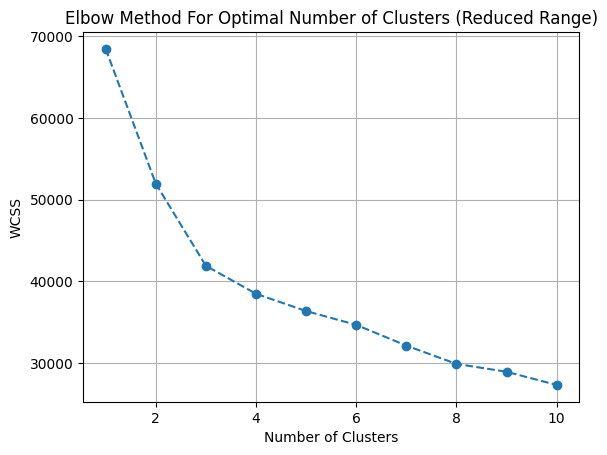

In [62]:
# Plot the results

plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [64]:
df = df.iloc[:,:-18]

In [65]:
df['furnishing_type'] = cluster_assignments

In [67]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1565,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1518,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
390,"['3 Fan', '1 Fridge', '1 Washing Machine', '1 Microwave', '3 Light', '1 Chimney', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Water Purifier']",2
246,"['4 Fan', '1 Exhaust Fan', '2 Geyser', '11 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
3430,"['1 Water Purifier', '9 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '21 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '7 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",1


## 5.features

In [68]:
df[['society','features']].sample(5)

,society,features
872,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
3536,ats triumph,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting', 'Water softening plant']"
519,godrej air,NaN
336,umang monsoon breeze,NaN
2989,experion windchants,"['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Swimming Pool', 'Piped-gas', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [69]:
df['features'].isnull().sum()

635

In [70]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [71]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [72]:
temp_df = df[df['features'].isnull()]

In [73]:
temp_df.shape

(635, 26)

In [74]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [80]:
df.loc[temp_df.index,'features'] = x.values

In [81]:
df['features'].isnull().sum()

481

In [82]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [83]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [84]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2929,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [85]:
features_binary_df.shape

(3803, 130)

In [86]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

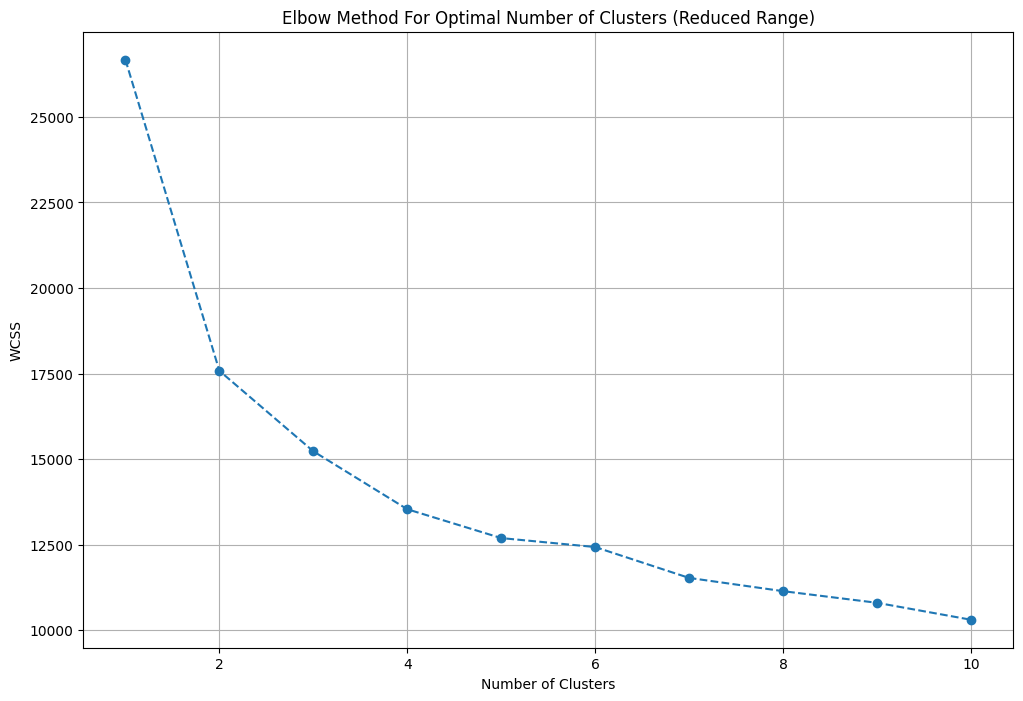

In [87]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [88]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [89]:
df['luxury_score'] = luxury_score

In [91]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,servant room,45.0,East,Undefined,"['Rapid Metro Sector 56', 'M3m 65th Avenue Mall', 'Golf Course Extension Road', 'Gurgaon - Delhi Expy', 'DPS International School', 'DPG Institute of Technology', 'Park Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel', 'SkyJumper Trampoline Park', 'PVR Drive in Theatre']",[],"['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']",NaN,NaN,2040.0,0,1,0,0,0,0,"[Bus Shelter, Infinity Pool, Swimming Pool, Bar/Chill-Out Lounge, Reflexology Park, Aerobics Centre, Restaurant, Terrace Garden, High Speed Elevators]",48


In [92]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [93]:
df.sample(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2628,house,independent,sector 4,0.47,3519.0,1336.0,Built Up area: 1350 (125.42 sq.m.),3,4,0,3.0,NaN,Undefined,NaN,1350.0,NaN,0,0,0,0,0,0,0


In [94]:
df.shape

(3803, 23)

In [95]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)